Вы аналитик российской авиакомпании F9, выполняющей внутренние пассажирские перевозки. Важно понять предпочтения пользователей, покупающих билеты на разные направления.

Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

**Шаг 1.  Аналитика средствами Python**

У вас есть файлы, в которых содержатся результаты запросов из предыдущих заданий.

**query_1.csv** — результат первого запроса. В нём содержится такая информация:

- *model* — **модель самолета;
- *flights_amount* — количество рейсов для каждой модели самолетов *model* в сентябре 2018 года.

**query_3.csv** — результат третьего запроса. В нём содержится такая информация:

- *city* — город;
- *average_flights* — среднее количество рейсов, прибывающих в город (*city*) за день в сентябре 2018 года.

 Для этих двух наборов данных нужно:

- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.

**Шаг 2.  Проверка гипотезы средствами Python**

**query_last.csv** — результат последнего запроса. В нём следующая информация:

- *week_number* — **номер недели;
- *ticket_amount* — количество проданных билетов за неделю;
- *festival_week —* есть ли на этой неделе фестиваль;
- *festival_name —* название фестиваля.

Проверьте гипотезу: «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время».

Пороговое значение *alpha* задайте самостоятельно.

Поясните:

- Как вы формулировали нулевую и альтернативную гипотезы;
- Какой критерий использовали для проверки гипотез и почему.

# 1. Аналитика

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

!pip install squarify
import squarify 

In [2]:
def square_chart (df, counts, title):
    labels = df.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
    sizes = df[counts].values.tolist()
    colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

    plt.figure(figsize=(12,8), dpi= 80)
    squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

    plt.title(title)
    plt.axis('off')
    plt.show()

In [5]:
df_1 = pd.read_csv('query_1.csv')
df_2 = pd.read_csv('query_3.csv')
df_3 = pd.read_csv('query_last.csv')

In [6]:
df_1.info()
df_1.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [7]:
df_2.info()
df_2.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
5,Барнаул,2.612903
6,Белгород,6.000000
7,Белоярский,2.000000
8,Благовещенск,1.000000
9,Братск,1.000000


In [8]:
df_3.info()
df_3.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
week_number      10 non-null int64
ticket_amount    10 non-null int64
festival_week    3 non-null float64
festival_name    3 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 448.0+ bytes


,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN
5,35,51360,NaN,NaN
6,36,51386,36.0,Видфест
7,37,51670,NaN,NaN
8,38,51518,NaN,NaN
9,39,51623,NaN,NaN


* df_1 - не вижу проблем в данных, требующих вмешательства


* df_2 - необходимо привести число полетов к целому значению, в остальном всё так же - пропусков, аномалий не вижу.


* df_3 - симметричные пропуски в столбцах festival_week и festival_name - на этих неделях фестивалей не было. Еще считаю, что столбец festival_week либо несет избыточную информацию, либо заполняется некорректно. Посмотрим в описание: "festival_week — есть ли на этой неделе фестиваль" - построение формулировки намекает на булевый тип данных (1 - есть фестивал на этой неделе, 0 - нет фестиваля на этой неделе), но по факту просто дублируется номер недели. От него избавимся. И заполним пропуски в столбце festival_name меткой.

In [9]:
df_2['average_flights'] = np.ceil(df_2['average_flights']).astype('int')
df_2.head(10)

,city,average_flights
0,Абакан,4
1,Анадырь,1
2,Анапа,3
3,Архангельск,6
4,Астрахань,3
5,Барнаул,3
6,Белгород,6
7,Белоярский,2
8,Благовещенск,1
9,Братск,1


In [10]:
df_3 = df_3[['week_number', 'ticket_amount', 'festival_name']]
df_3 = df_3.fillna('None')
df_3.head(10)

,week_number,ticket_amount,festival_name
0,30,43568,Park Live
1,31,51034,Пикник Афиши
2,32,51675,None
3,33,51378,None
4,34,51492,None
5,35,51360,None
6,36,51386,Видфест
7,37,51670,None
8,38,51518,None
9,39,51623,None


#### Рассмотрим данные поближе:

,flights_amount
count,8.000000
mean,2035.625000
std,1965.203947
min,300.000000
25%,605.250000
50%,795.000000
75%,4250.250000
max,4557.000000


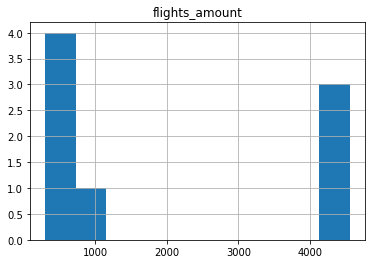

In [11]:
df_1.hist()
df_1.describe()

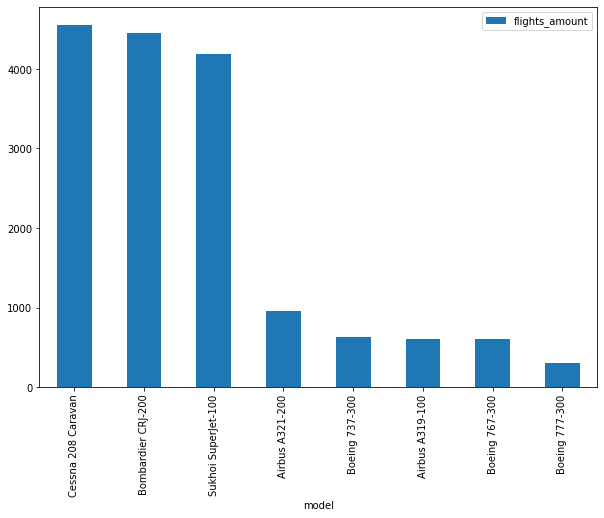

In [12]:
data = df_1.sort_values(by='flights_amount', ascending=False).plot(kind='bar', rot=90,x = 'model', y = 'flights_amount', figsize=(10,7))

У нас всего 8 самолетов. Медиана и среднее сильно отличаются дргу от друга, распределение скошено вправо, а значит, некоторые модели самолетов используются чаще остальных.

,average_flights
count,101.000000
mean,5.841584
std,13.139051
min,1.000000
25%,2.000000
50%,3.000000
75%,6.000000
max,130.000000


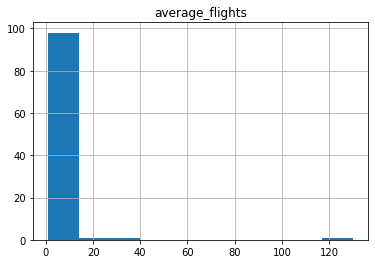

In [13]:
df_2.hist()
df_2.describe()

(0, 15)

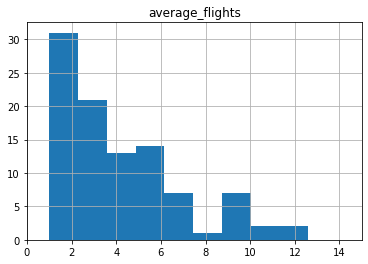

In [14]:
df_2.hist(bins=100)
ax = plt.gca()
ax.set_xlim(0,15)

In [15]:
df_2['city'].duplicated().sum()

0

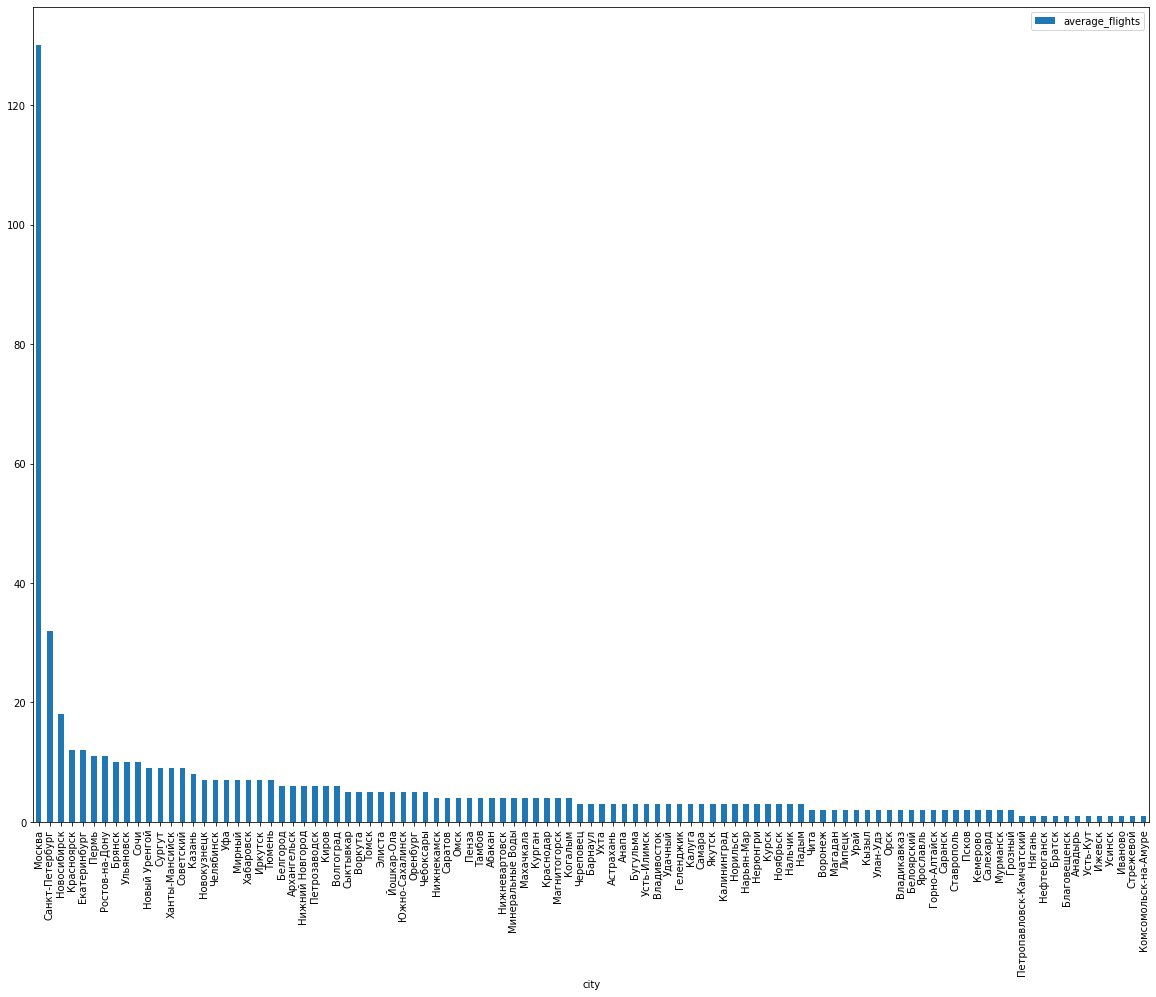

In [16]:
data = df_2.sort_values(by='average_flights', ascending=False).plot(kind='bar', rot=90,x = 'city', y = 'average_flights', figsize=(20,15))

В датасете представлены данные о полетах в 101 город. Количество полетов варьируется от 1 до 129, а среднее число полетов - 5. Медиана = 3, значит, распределение скошено вправо: Есть города в которые летают чаще остальных, но их немного, и поэтому они не оказывают сильного влияния на среднее. Это крупные города, они будут в топ-10 ниже. Дубликатов среди городов нет.

Соберем топ-10 городов и добавим отношение каждого города по числу полетов к другим городам в %

In [17]:
top_city = df_2.sort_values(by='average_flights', ascending=False).head(10)
top_city['total_flights'] = top_city['average_flights'].sum()
top_city['per_flights, %'] = np.ceil(top_city['average_flights'] / top_city['total_flights'] * 100).astype('int')
top_city = top_city[['city', 'average_flights', 'per_flights, %']]
top_city

,city,average_flights,"per_flights, %"
43,Москва,130,51
70,Санкт-Петербург,32,13
54,Новосибирск,18,8
33,Красноярск,12,5
20,Екатеринбург,12,5
63,Пермь,11,5
67,Ростов-на-Дону,11,5
10,Брянск,10,4
84,Ульяновск,10,4
74,Сочи,10,4


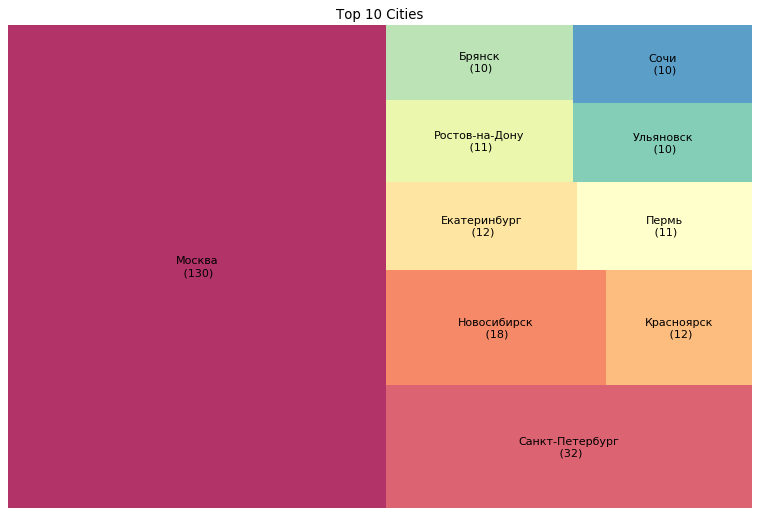

In [18]:
square_chart(top_city,'average_flights', 'Top 10 Cities')

Если с Москвой и Санкт-Петербургом все понятно (самые крупные и привлекательные для туристов города), то с Новосибирском ситуация не так очевидна - в бешеную популярность академгородка не очень верится. 

Могу разве что предположить, что популярность Новосибирска у исследуемой авиакомпании F9 можно обосновать обосновать тем, что российская авиакомпания S7, по случайному совпадению, базируется в Новосибирске :).

# 2. Проверка гипотезы

Для проверки гипотезы я буду использовать критерий Смирнова,
>Критерий однородности Смирнова используется для проверки гипотезы о принадлежности двух независимых выборок одному закону распределения, то есть о том, что два эмпирических распределения соответствуют одному и тому же закону. © [Википедия](https://ru.wikipedia.org/wiki/%D0%9A%D1%80%D0%B8%D1%82%D0%B5%D1%80%D0%B8%D0%B9_%D1%81%D0%BE%D0%B3%D0%BB%D0%B0%D1%81%D0%B8%D1%8F_%D0%9A%D0%BE%D0%BB%D0%BC%D0%BE%D0%B3%D0%BE%D1%80%D0%BE%D0%B2%D0%B0)

потому что гипотеза в задании сформулирована как "не отличается", то есть, имеет ли место быть однородность.

Сформулируем гипотезы:
- Нулевая гипотеза: «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время»;
- Альтернативная гипотеза: «Средний спрос на билеты во время фестивалей отличается от среднего спроса на билеты в обычное время».

Пороговое значение alpha задаем традиционно равное 0.05

In [ ]:
alpha = .05

fest_only = df_3.query('festival_name != "None"')
fest_only = fest_only['ticket_amount']

no_fest = df_3.query('festival_name == "None"') 
no_fest = no_fest['ticket_amount']

results = stats.ks_2samp(
    fest_only, 
    no_fest)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Вывод - средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время. Хотя я не совсем согласна что такие данные для исследования корректны - у нас есть данные только о фестивалях, проходивших в Москве, и нет информации о  фестивалях в других городах. Кроме того, в выборке всего 10 наблюдений. Считаю, что этого мало для хорошего исследования. Может быть, конкретно эти фестивали были не привлекательны для поездки в Москву.

### Общий вывод 

1. Были исследованы 3 набора данных:

  * df_1 - данные о количестве рейсов для каждой модели самолетов в сентябре 2018 года;
  * df_2 - данные о среднем количестве рейсов, прибывающих в каждый из 101 города за день в сентябре 2018 года;
  * df_3 - данные о фестивалях и количестве проданных авиабилетов на той же неделе, когда проходил фестиваль.


2. Все 3 датасета были изучены, в них были исправлены ошибки, по всем датасетам были построены графики и сделаны выводы.


3. Определен топ-10 городов по количеству рейсов: его возглавляют Москва, Санкт-Петербург и Новосибирск.


4. Гипотезу о том, что средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время отвергнуть не удалось. 


5. Считаю также важным указать на то, что датасет с данными о фестивалях (df_3) не очень подходит для исследования: он содержит информацию о фестивалях только в Москве, в то время как имеется информация о 101 населенном пункте в df_2. Также, df_3 содержит всего 10 наблюдений - этого недостаточно для качественного исследования.